### Datasets : 

1. RAVDESS : https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
2. CREMA : https://www.kaggle.com/datasets/ejlok1/cremad
3. TESS : https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
4. SAVEE : https://www.kaggle.com/datasets/barelydedicated/savee-database

### Installing libraries

In [3]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install librosa

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing libraries 

In [4]:
import os
import sys

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
ravdess = "C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIENCE\TASK2-Speech_Emotion_Recognition\\ravdess\\"
ravdess_dir = os.listdir(ravdess)

f_emo = []
f_path = []

for dir in ravdess_dir:
    actor = os.listdir(ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        f_emo.append(int(part[2]))
        f_path.append(ravdess + dir + '/' + file)
        
emotion_df = pd.DataFrame(f_emo, columns=['Emotions'])

path_df = pd.DataFrame(f_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)

ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
ravdess_df

Emotions                                               Path
0      neutral  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
1      neutral  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
2      neutral  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
3      neutral  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
4         calm  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
...        ...                                                ...
1435  surprise  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
1436  surprise  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
1437  surprise  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
1438  surprise  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
1439  surprise  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...

[1440 rows x 2 columns]

In [7]:
crema = "C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIENCE\TASK2-Speech_Emotion_Recognition\\crema\\"
crema_dir = os.listdir(crema)
f_emotion = []
f_path = []

for file in crema_dir:
    f_path.append(crema + file)
    part = file.split('_')
    if part[2] == 'SAD':
        f_emotion.append('sad')
    elif part[2] == 'ANG':
        f_emotion.append('angry')
    elif part[2] == 'DIS':
        f_emotion.append('disgust')
    elif part[2] == 'FEA':
        f_emotion.append('fear')
    elif part[2] == 'HAP':
        f_emotion.append('happy')
    elif part[2] == 'NEU':
        f_emotion.append('neutral')
    else:
        f_emotion.append('Unknown')
        
emo_df = pd.DataFrame(f_emotion, columns=['Emotions'])

path_df = pd.DataFrame(f_path, columns=['Path'])
crema_df = pd.concat([emo_df, path_df], axis=1)
crema_df.head()

Emotions                                               Path
0    angry  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
1  disgust  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
2     fear  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
3    happy  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
4  neutral  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...

In [8]:
tess = "C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIENCE\TASK2-Speech_Emotion_Recognition\\tess\\"

tess_dir = os.listdir(tess)

f_emo = []
f_path = []

for dir in tess_dir:
    files = os.listdir(tess + dir)
    for file in files:
        part = file.split('.')[0]+"_"
        part = part.split('_')[2]
        if part == 'ps':
            f_emo.append('surprise')
        else:
            f_emo.append(part)
        f_path.append(tess + dir + '/' + file)
        
emo_df = pd.DataFrame(f_emo, columns=['Emotions'])
path_df = pd.DataFrame(f_path, columns=['Path'])
tess_df = pd.concat([emo_df, path_df], axis=1)
tess_df.head()

Emotions                                               Path
0    angry  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
1    angry  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
2    angry  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
3    angry  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
4    angry  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...

In [10]:
savee = "C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIENCE\TASK2-Speech_Emotion_Recognition\\savee\\"
savee_dir = os.listdir(savee)

f_emo = []
f_path = []

for file in savee_dir:
    f_path.append(savee + file)
    file = file + "_"
    part = file.split('_')[1]
    ele = part[:-6]
    if ele == 'a':
        f_emo.append('angry')
    elif ele == 'd':
        f_emo.append('disgust')
    elif ele == 'f':
        f_emo.append('fear')
    elif ele == 'h':
        f_emo.append('happy')
    elif ele == 'n':
        f_emo.append('neutral')
    elif ele == 'sa':
        f_emo.append('sad')
    else:
        f_emo.append('surprise')
        
emo_df = pd.DataFrame(f_emo, columns=['Emotions'])
path_df = pd.DataFrame(f_path, columns=['Path'])
savee_df = pd.concat([emo_df, path_df], axis=1)
savee_df.head()

Emotions                                               Path
0  surprise  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
1  surprise  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
2  surprise  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
3  surprise  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
4  surprise  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...

In [11]:
data_path = pd.concat([ravdess_df, crema_df, tess_df, savee_df], axis=0)

# because some emotions were "surprise" and some were "surprised"
data_path['Emotions'] = data_path['Emotions'].replace(['surprised'], 'surprise')

# because of missing values in emotions, we removed them from dataframe
data_path = data_path[data_path['Emotions'] != ""]

data_path.to_csv("data_path.csv", index=False)
data_path.head()

Emotions                                               Path
0  neutral  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
1  neutral  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
2  neutral  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
3  neutral  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...
4     calm  C:\Users\hp\Desktop\Projects\CC-JAN-DATA_SCIEN...

### Data Visualization and Exploration

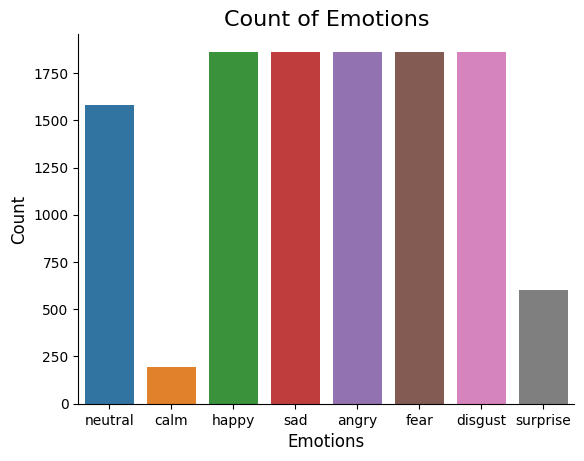

In [12]:
plt.title('Count of Emotions', size=16)
sns.countplot(x=data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [13]:
import librosa
import librosa.display
from IPython.display import Audio

In [14]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

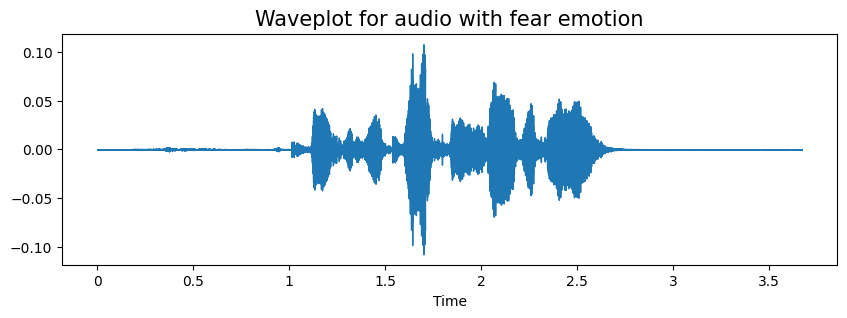

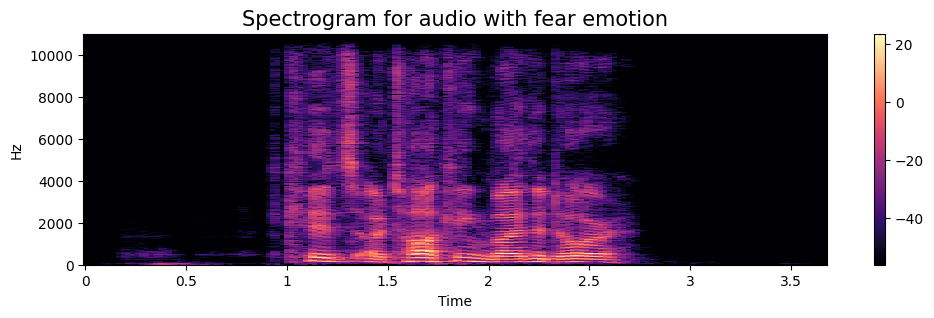

In [15]:
emotion='fear'
x = data_path.Path[data_path.Emotions==emotion]
for i in x:
    path = i 
    break
# path = np.array(data_path.Path[data_path.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

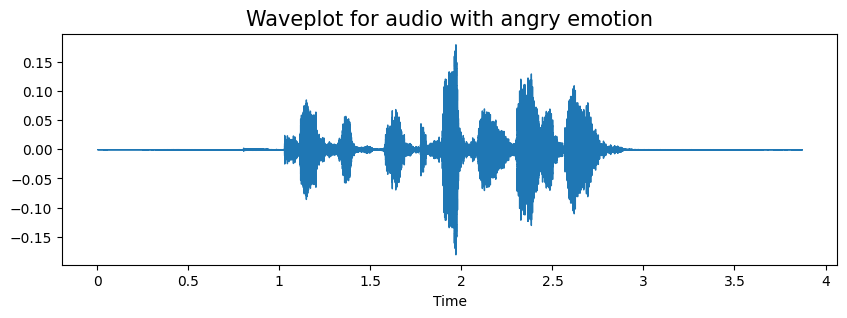

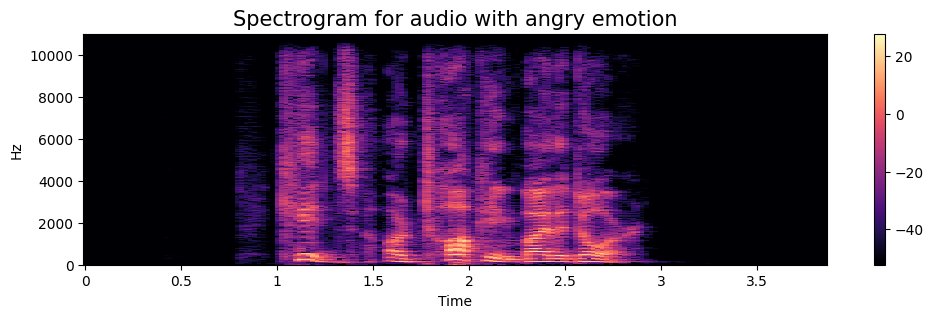

In [16]:
emotion='angry'
x = data_path.Path[data_path.Emotions==emotion]
for i in x:
    path = i 
    break
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

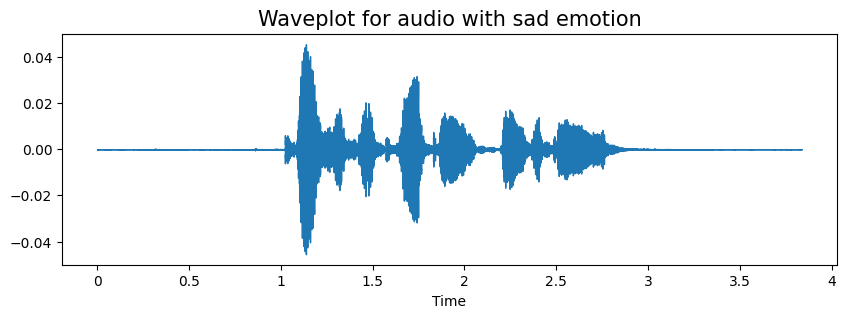

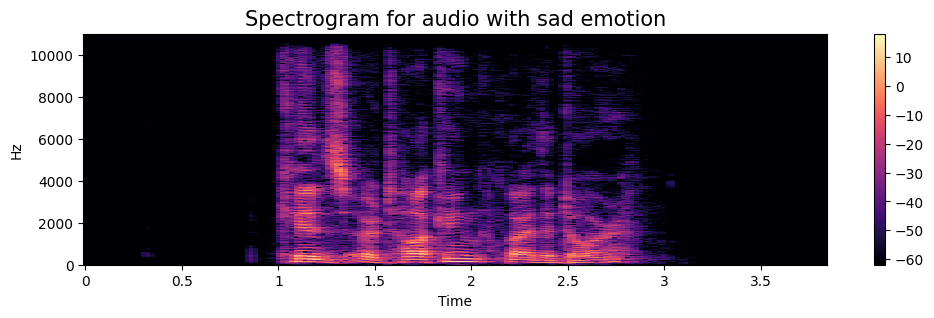

In [17]:
emotion='sad'
x = data_path.Path[data_path.Emotions==emotion]
for i in x:
    path = i 
    break
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

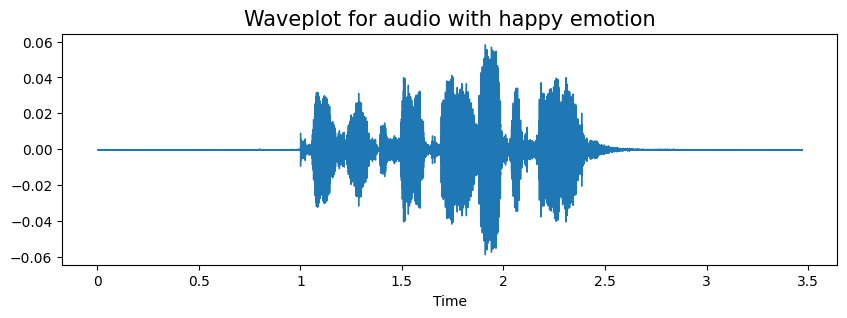

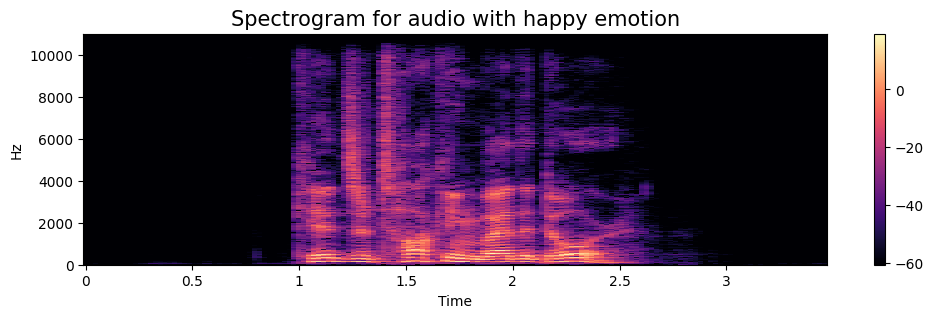

In [18]:
emotion='happy'
x = data_path.Path[data_path.Emotions==emotion]
for i in x:
    path = i 
    break
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [19]:
def noise(data):
    noise_amp = 0.02*np.random.randn(len(data))*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
x = data_path.Path
for i in x:
    path = i 
    break
data, sample_rate = librosa.load(path)

1. sample audio

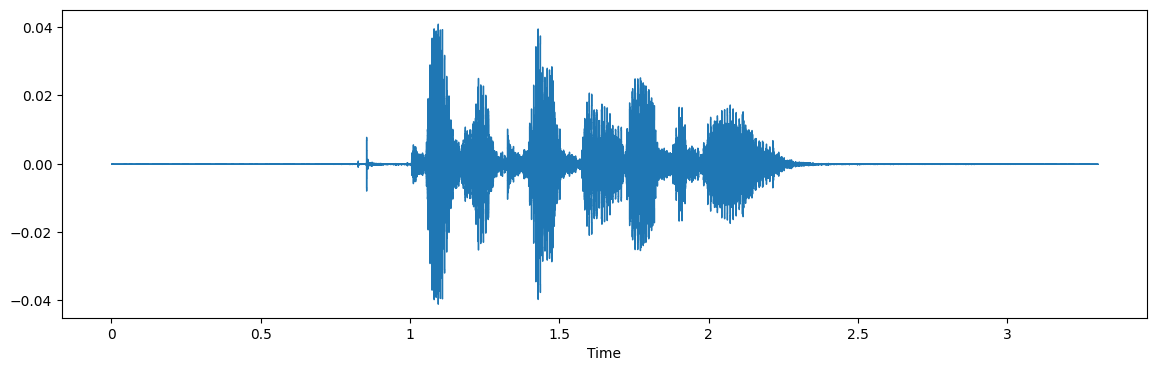

In [20]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

2. Noise injection

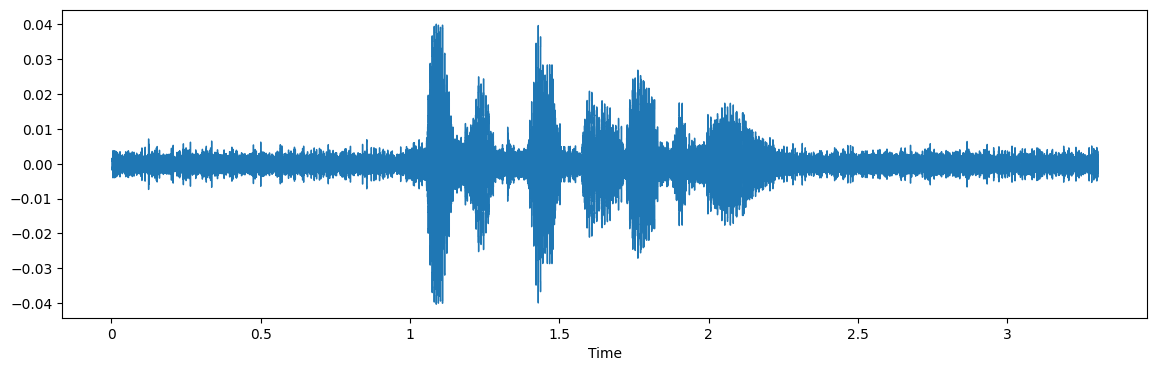

In [21]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

C:\Users\hp\AppData\Local\Temp\ipykernel_13068\6708006.py:7: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)


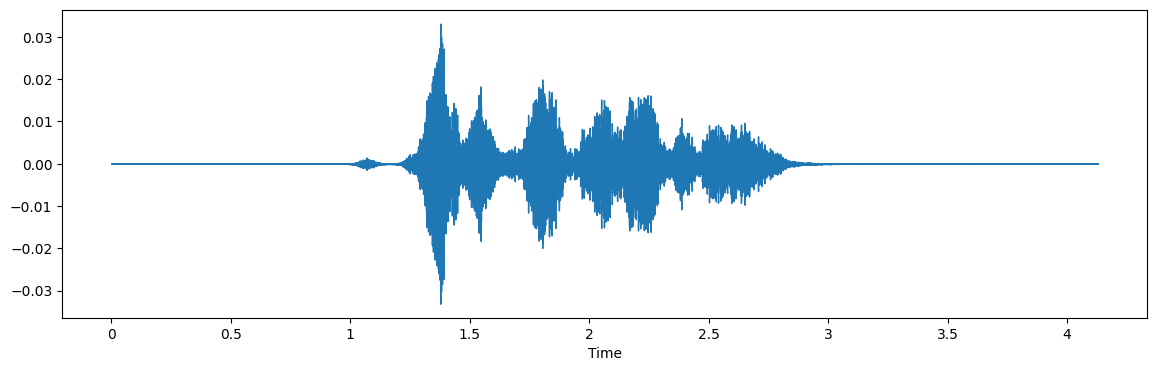

In [22]:
x = stretch(data, rate=0.8)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

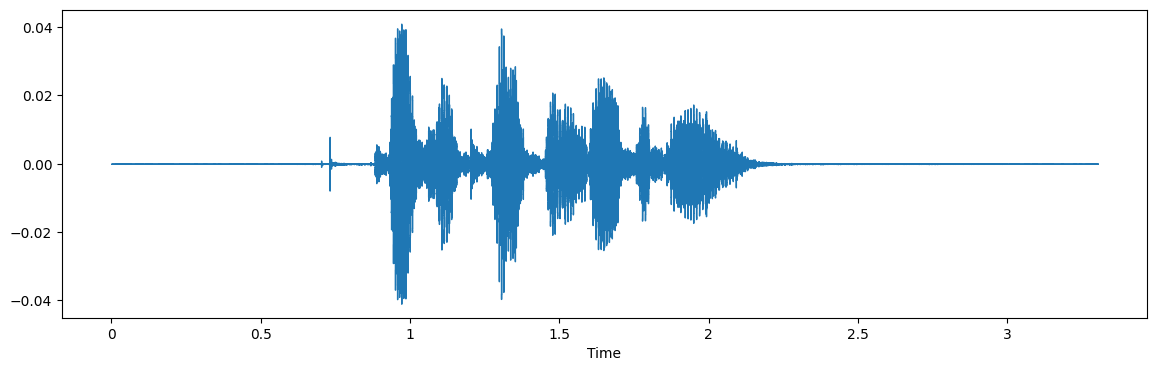

In [23]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

C:\Users\hp\AppData\Local\Temp\ipykernel_13068\6708006.py:14: FutureWarning: Pass sr=22050, n_steps=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


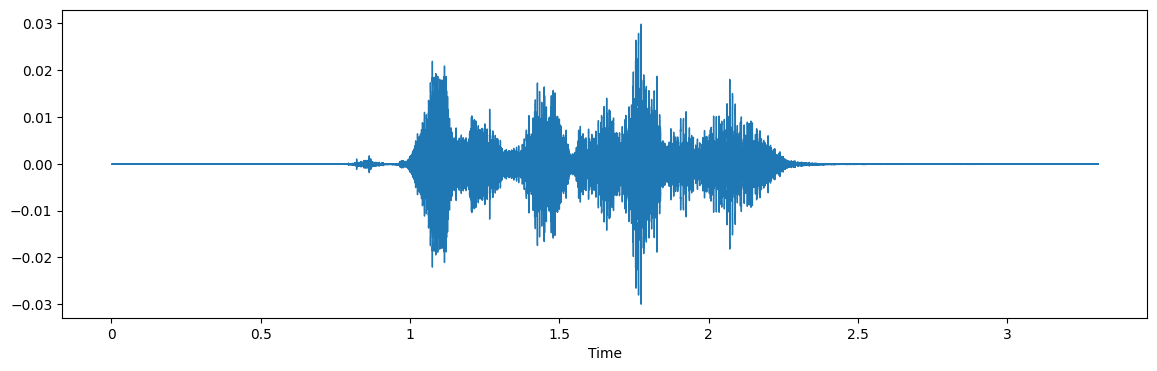

In [24]:
x = pitch(data, sample_rate, pitch_factor=0.7)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

### Feature Extraction

In [25]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [26]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

C:\Users\hp\AppData\Local\Temp\ipykernel_13068\6708006.py:7: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)
C:\Users\hp\AppData\Local\Temp\ipykernel_13068\6708006.py:14: FutureWarning: Pass sr=22050, n_steps=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to estimate tuning from empty frequency set.
  return f(*args, **kwargs)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\hp\\Desktop\\Projects\\CC-JAN-DATA_SCIENCE\\speech emotion recognition\\tess\\TESS Toronto emotional speech set data/OAF_Pleasant_surprise'

In [27]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.283226  0.739174  0.760110  0.738748  0.712194  0.687986  0.667279   
1  0.306835  0.800388  0.829112  0.802102  0.808183  0.803346  0.696940   
2  0.181467  0.629995  0.730929  0.743651  0.680889  0.670727  0.673700   
3  0.254530  0.676571  0.724970  0.725722  0.668644  0.645344  0.671470   
4  0.303263  0.778867  0.817291  0.799747  0.776419  0.786726  0.719977   

          7         8         9  ...           153           154  \
0  0.694000  0.742275  0.762594  ...  4.312694e-06  3.293364e-06   
1  0.675861  0.718859  0.759711  ...  5.195863e-05  4.992418e-05   
2  0.669033  0.709932  0.745144  ...  8.582505e-07  9.570447e-07   
3  0.631493  0.681748  0.709889  ...  6.987414e-06  7.038922e-06   
4  0.652443  0.701985  0.730181  ...  6.801170e-05  7.129536e-05   

            155           156           157           158           159  \
0  2.149554e-06  2.260914e-06  4.562519e-06  4.985616e-06  1.324619e-06   
1  4.785243e-05  4.815408e-05  5.197027e-05  5.228473e-05  4.804242e-05   
2  7.741540e-07  5.212421e-07  3.252106e-07  4.883136e-07  2.353670e-07   
3  6.659573e-06  6.937638e-06  1.117492e-05  5.767251e-06  2.024577e-06   
4  6.883905e-05  7.158375e-05  7.477922e-05  6.652696e-05  6.347126e-05   

            160           161   labels  
0  1.469305e-07  3.053402e-09  neutral  
1  4.802431e-05  4.795301e-05  neutral  
2  2.240905e-08  9.753157e-11  neutral  
3  1.944936e-07  2.701240e-09  neutral  
4  6.095684e-05  5.980456e-05  neutral  

[5 rows x 163 columns]

### Data Preparation

In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [29]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [30]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((23134, 162), (23134, 8), (7712, 162), (7712, 8))

In [32]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((23134, 162), (23134, 8), (7712, 162), (7712, 8))

In [33]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((23134, 162, 1), (23134, 8), (7712, 162, 1), (7712, 8))

### Modelling

In [34]:
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

In [35]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 21, 128)          0

In [36]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
362/362 [==============================] - 52s 140ms/step - loss: 1.7380 - accuracy: 0.3038 - val_loss: 1.5486 - val_accuracy: 0.3693 - lr: 0.0010
Epoch 2/50
362/362 [==============================] - 49s 135ms/step - loss: 1.5572 - accuracy: 0.3696 - val_loss: 1.4533 - val_accuracy: 0.4103 - lr: 0.0010
Epoch 3/50
362/362 [==============================] - 58s 161ms/step - loss: 1.4978 - accuracy: 0.3956 - val_loss: 1.4273 - val_accuracy: 0.4092 - lr: 0.0010
Epoch 4/50
362/362 [==============================] - 49s 136ms/step - loss: 1.4480 - accuracy: 0.4136 - val_loss: 1.3799 - val_accuracy: 0.4437 - lr: 0.0010
Epoch 5/50
362/362 [==============================] - 47s 131ms/step - loss: 1.4110 - accuracy: 0.4270 - val_loss: 1.3436 - val_accuracy: 0.4570 - lr: 0.0010
Epoch 6/50
362/362 [==============================] - 49s 136ms/step - loss: 1.3794 - accuracy: 0.4404 - val_loss: 1.3175 - val_accuracy: 0.4752 - lr: 0.0010
Epoch 7/50
362/362 [==============================] 

241/241 [==============================] - 5s 20ms/step - loss: 1.3025 - accuracy: 0.5609
Accuracy of the model on test data :  56.094396114349365 %


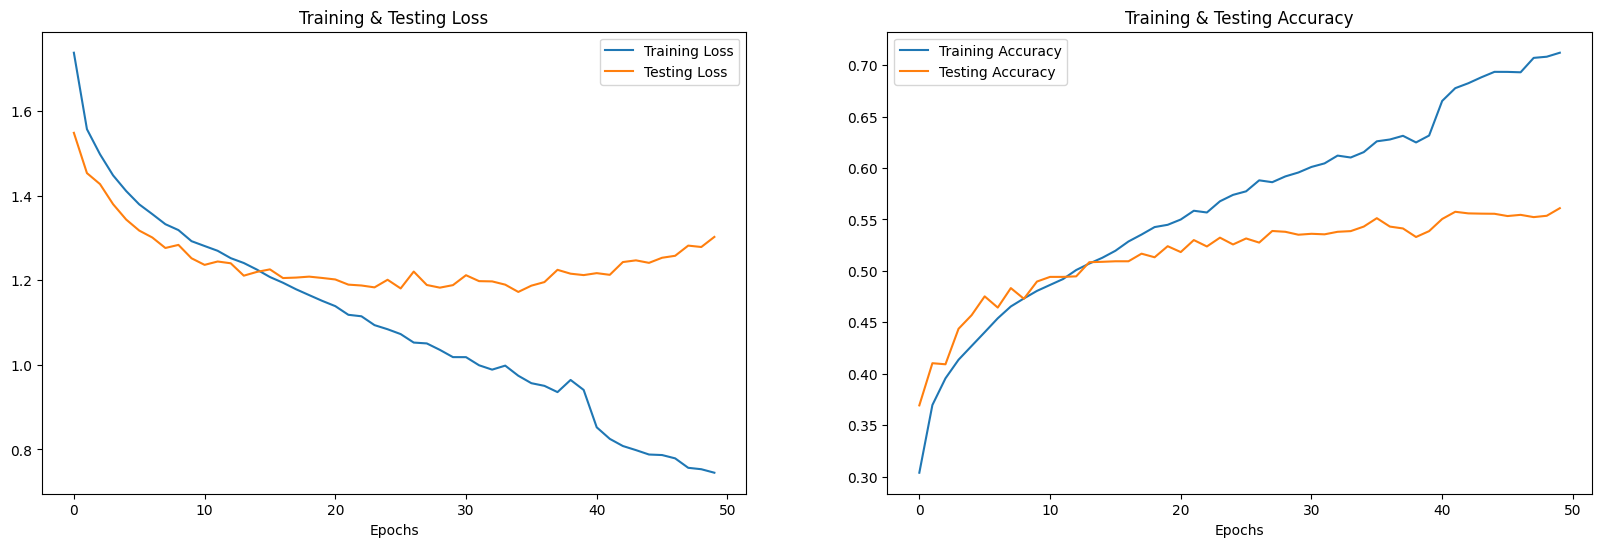

In [37]:
print("Accuracy of the model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [38]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

241/241 [==============================] - 5s 19ms/step


In [39]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0              sad          fear
1            happy         happy
2              sad          fear
3              sad          fear
4            angry         angry
5            angry         happy
6            happy          fear
7            happy         happy
8          disgust       neutral
9         surprise          fear

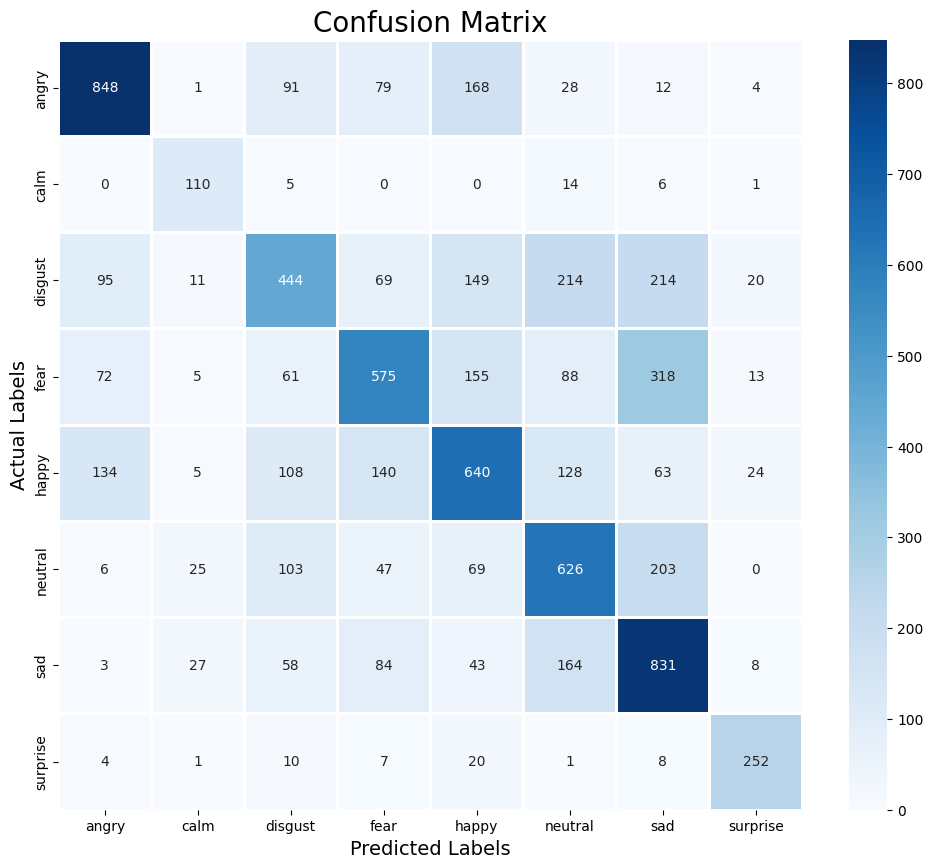

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.73      0.69      0.71      1231
        calm       0.59      0.81      0.69       136
     disgust       0.50      0.37      0.42      1216
        fear       0.57      0.45      0.50      1287
       happy       0.51      0.52      0.51      1242
     neutral       0.50      0.58      0.53      1079
         sad       0.50      0.68      0.58      1218
    surprise       0.78      0.83      0.81       303

    accuracy                           0.56      7712
   macro avg       0.59      0.61      0.59      7712
weighted avg       0.56      0.56      0.56      7712

